**PHẦN 1**

In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra xem cột "DH1" có tồn tại không
if "DH1" in df.columns:
    # 1. Sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần
    df_sorted_dh1 = df.sort_values(by="DH1", ascending=True)
    print(df_sorted_dh1.head())  # Hiển thị 5 dòng đầu để kiểm tra
else:
    print("Cột 'DH1' không tồn tại trong dataset. Kiểm tra lại tên cột nhé!")


    STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM1  TBM2  TBM3  \
53   54  4.9  5.9  6.2  5.6  5.9  5.0  7.0  5.6  6.1  ...  5.69  6.26  6.02   
43   44  6.6  7.2  5.9  6.9  7.6  8.1  7.3  6.7  6.3  ...  7.05  6.61  6.77   
72   73  5.5  6.6  7.2  7.6  5.5  6.7  6.7  5.2  6.0  ...  6.20  5.88  6.22   
5     6  9.3  7.6  7.9  8.6  7.0  7.3  7.7  7.9  9.6  ...  7.96  8.54  7.38   
87   88  7.3  4.3  5.3  5.8  4.9  3.7  5.6  5.3  5.9  ...  5.44  5.78  6.48   

    XL1  XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT  
53   TB   TB   TB    2.276    2.504    2.408   0.0  
43    K    K    K    2.820    2.644    2.708   0.0  
72   TB   TB   TB    2.480    2.352    2.488   0.0  
5     K    G    K    3.184    3.416    2.952   0.0  
87   TB   TB   TB    2.176    2.312    2.592   0.0  

[5 rows x 66 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Mục mới

In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra xem các cột cần thiết có tồn tại không
if {"GT", "DH2"}.issubset(df.columns):
    # 2. Sắp xếp theo nhóm giới tính (GT), sau đó theo điểm DH2 tăng dần
    df_sorted_dh2_gt = df.sort_values(by=["GT", "DH2"], ascending=[True, True])

    # Hiển thị 5 dòng đầu để kiểm tra
    print(df_sorted_dh2_gt.head())
else:
    print("Cột 'GT' hoặc 'DH2' không tồn tại trong dataset. Kiểm tra lại tên cột nhé!")


    STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM1  TBM2  TBM3  \
95   96  8.6  6.9  7.4  8.8  7.6  5.8  7.3  5.7  8.9  ...  7.43  7.42  6.83   
25   26  3.6  5.8  6.9  6.1  5.5  7.2  5.5  4.3  4.2  ...  5.40  5.20  5.09   
24   25  2.4  4.1  3.6  5.5  5.9  5.6  4.9  4.2  3.3  ...  4.45  4.88  5.41   
46   47  6.7  6.8  6.4  5.9  5.6  6.4  8.0  6.8  6.6  ...  6.49  6.51  6.16   
13   14  4.9  5.4  5.0  5.0  5.8  7.0  4.2  5.8  4.5  ...  5.38  5.51  6.26   

    XL1  XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT  
95    K    K    K    2.972    2.968    2.732   0.0  
25   TB   TB   TB    2.160    2.080    2.036   0.0  
24    Y    Y   TB    1.780    1.952    2.164   0.0  
46   TB    K   TB    2.596    2.604    2.464   0.0  
13   TB   TB   TB    2.152    2.204    2.504   0.0  

[5 rows x 66 columns]


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra xem các cột cần thiết có tồn tại không
if {"KT", "DH1"}.issubset(df.columns):
    # 3. Tạo pivot-table thống kê DH1 theo KT
    pivot_kt = df.pivot_table(
        values="DH1", index="KT",
        aggfunc=[
            "count", "sum", "mean", "median", "min", "max", "std",
            lambda x: x.quantile(0.25),
            lambda x: x.quantile(0.5),
            lambda x: x.quantile(0.75)
        ]
    )

    # Đổi tên cột cho dễ đọc
    pivot_kt.columns = ["count", "sum", "mean", "median", "min", "max", "std", "Q1", "Q2", "Q3"]

    # Hiển thị kết quả
    print(pivot_kt)
else:
    print("Cột 'KT' hoặc 'DH1' không tồn tại trong dataset. Kiểm tra lại tên cột nhé!")


    count     sum      mean  median   min   max       std      Q1    Q2     Q3
KT                                                                            
A      49  163.50  3.336735    3.25  1.00  6.50  1.274296  2.2500  3.25  4.250
A1      6   17.50  2.916667    3.00  2.00  4.25  0.861201  2.1875  3.00  3.250
B       9   29.50  3.277778    3.50  1.75  4.50  0.823905  3.2500  3.50  3.750
C      14   79.25  5.660714    5.25  4.75  7.00  0.812209  5.0625  5.25  6.375
D1     22   84.25  3.829545    3.75  1.25  6.75  1.370146  3.0000  3.75  4.875


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra xem các cột cần thiết có tồn tại không
if {"KT", "KV", "DH1"}.issubset(df.columns):
    # 4. Tạo pivot-table thống kê DH1 theo KT và KV
    pivot_kt_kv = df.pivot_table(
        values="DH1",
        index=["KT", "KV"],
        aggfunc=[
            "count", "sum", "mean", "median", "min", "max", "std",
            lambda x: x.quantile(0.25),
            lambda x: x.quantile(0.5),
            lambda x: x.quantile(0.75)
        ]
    )

    # Đặt lại tên cột
    pivot_kt_kv.columns = ["count", "sum", "mean", "median", "min", "max", "std", "Q1", "Q2", "Q3"]

    # Hiển thị kết quả
    print(pivot_kt_kv)
else:
    print("Cột 'KT', 'KV' hoặc 'DH1' không tồn tại trong dataset. Kiểm tra lại tên cột nhé!")


        count    sum      mean  median   min   max       std      Q1     Q2  \
KT KV                                                                         
A  1       29  93.75  3.232759   3.250  1.00  6.50  1.369194  2.0000  3.250   
   2        9  31.75  3.527778   3.500  2.00  6.25  1.427653  2.2500  3.500   
   2NT     11  38.00  3.454545   3.500  2.00  4.75  0.913908  2.8750  3.500   
A1 1        2   4.75  2.375000   2.375  2.00  2.75  0.530330  2.1875  2.375   
   2NT      4  12.75  3.187500   3.250  2.00  4.25  0.921389  2.9375  3.250   
B  1        8  25.75  3.218750   3.375  1.75  4.50  0.860207  3.0000  3.375   
   2NT      1   3.75  3.750000   3.750  3.75  3.75       NaN  3.7500  3.750   
C  1        8  43.50  5.437500   5.250  4.75  7.00  0.728869  5.0000  5.250   
   2        2  11.50  5.750000   5.750  5.00  6.50  1.060660  5.3750  5.750   
   2NT      4  24.25  6.062500   6.000  5.25  7.00  0.943729  5.2500  6.000   
D1 1       13  46.75  3.596154   3.500  1.50  5.75  

In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra xem các cột cần thiết có tồn tại không
if {"KT", "KV", "DT", "DH1"}.issubset(df.columns):
    # 5. Tạo pivot-table thống kê DH1 theo KT, KV và DT
    pivot_kt_kv_dt = df.pivot_table(
        values="DH1",
        index=["KT", "KV", "DT"],
        aggfunc=[
            "count", "sum", "mean", "median", "min", "max", "std",
            lambda x: x.quantile(0.25),
            lambda x: x.quantile(0.5),
            lambda x: x.quantile(0.75)
        ]
    )

    # Đặt lại tên cột
    pivot_kt_kv_dt.columns = ["count", "sum", "mean", "median", "min", "max", "std", "Q1", "Q2", "Q3"]

    # Hiển thị kết quả
    print(pivot_kt_kv_dt)
else:
    print("Cột 'KT', 'KV', 'DT' hoặc 'DH1' không tồn tại trong dataset. Kiểm tra lại tên cột!")


            count    sum      mean  median   min   max       std      Q1  \
KT KV  DT                                                                  
A  1   0.0     29  93.75  3.232759   3.250  1.00  6.50  1.369194  2.0000   
   2   0.0      8  27.50  3.437500   3.000  2.00  6.25  1.498511  2.2500   
       6.0      1   4.25  4.250000   4.250  4.25  4.25       NaN  4.2500   
   2NT 0.0     11  38.00  3.454545   3.500  2.00  4.75  0.913908  2.8750   
A1 1   0.0      2   4.75  2.375000   2.375  2.00  2.75  0.530330  2.1875   
   2NT 0.0      4  12.75  3.187500   3.250  2.00  4.25  0.921389  2.9375   
B  1   0.0      8  25.75  3.218750   3.375  1.75  4.50  0.860207  3.0000   
   2NT 0.0      1   3.75  3.750000   3.750  3.75  3.75       NaN  3.7500   
C  1   0.0      8  43.50  5.437500   5.250  4.75  7.00  0.728869  5.0000   
   2   0.0      2  11.50  5.750000   5.750  5.00  6.50  1.060660  5.3750   
   2NT 0.0      4  24.25  6.062500   6.000  5.25  7.00  0.943729  5.2500   
D1 1   0.0  

**PHẦN 2**

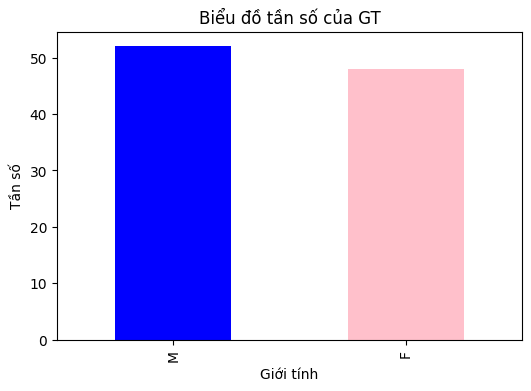

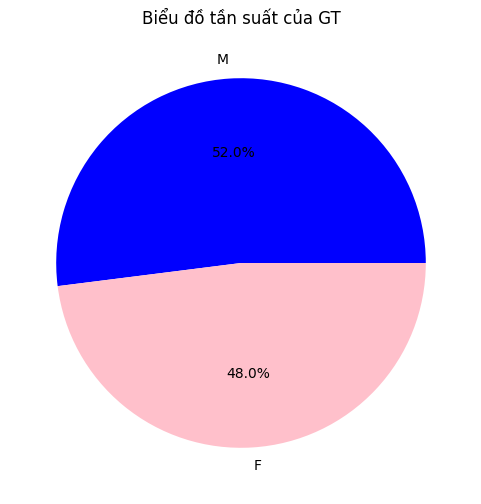

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra nếu cột 'GT' có trong dữ liệu
if 'GT' not in df.columns:
    raise ValueError("Cột 'GT' không tồn tại trong dữ liệu!")

# 1. Trình bày dữ liệu biến GT (Giới tính)
# Lập bảng tần số và tần suất
gt_counts = df["GT"].value_counts()
gt_freq = gt_counts / gt_counts.sum()

# Vẽ biểu đồ tần số (cột)
plt.figure(figsize=(6, 4))
gt_counts.plot(kind="bar", color=["blue", "pink"])
plt.title("Biểu đồ tần số của GT")
plt.xlabel("Giới tính")
plt.ylabel("Tần số")
plt.show()

# Vẽ biểu đồ tần suất (tròn)
plt.figure(figsize=(6, 6))
gt_counts.plot(kind="pie", autopct="%.1f%%", colors=["blue", "pink"])
plt.title("Biểu đồ tần suất của GT")
plt.ylabel("")
plt.show()



Bảng thống kê US_TBM1:
count    100.000000
mean       2.434480
std        0.391203
min        1.616000
25%        2.107000
50%        2.480000
75%        2.724000
max        3.232000
Name: US_TBM1, dtype: float64


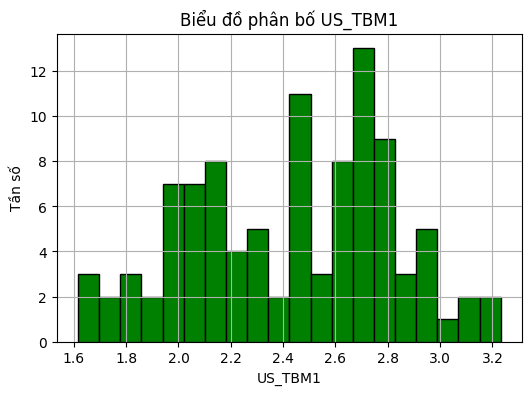


Bảng thống kê US_TBM2:
count    100.000000
mean       2.559600
std        0.377656
min        1.768000
25%        2.223000
50%        2.588000
75%        2.893000
max        3.416000
Name: US_TBM2, dtype: float64


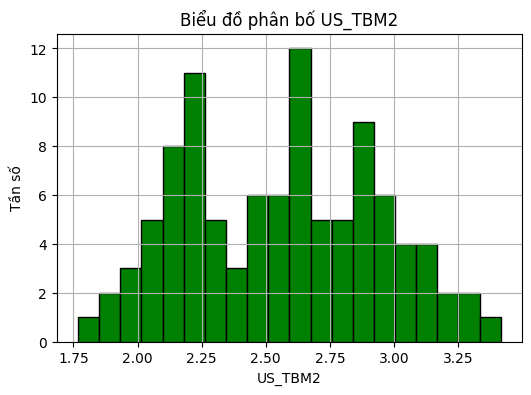


Bảng thống kê US_TBM3:
count    100.00000
mean       2.67176
std        0.29981
min        1.91600
25%        2.47300
50%        2.70600
75%        2.87400
max        3.31600
Name: US_TBM3, dtype: float64


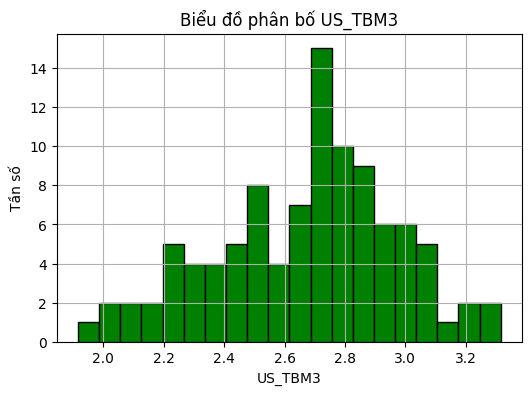

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra sự tồn tại của các cột trong dữ liệu
required_columns = ["US_TBM1", "US_TBM2", "US_TBM3"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Cột '{col}' không tồn tại trong dữ liệu!")

# 2. Trình bày dữ liệu lần lượt các biến US_TBM1, US_TBM2 và US_TBM3
for var in required_columns:
    print(f"\nBảng thống kê {var}:")
    print(df[var].describe())

    # Vẽ biểu đồ phân bố
    plt.figure(figsize=(6, 4))
    df[var].hist(bins=20, color="green", edgecolor="black")
    plt.title(f"Biểu đồ phân bố {var}")
    plt.xlabel(var)
    plt.ylabel("Tần số")
    plt.grid(True)  # Thêm lưới vào biểu đồ để dễ quan sát hơn
    plt.show()


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra sự tồn tại của cột 'GT' và 'DT'
if 'GT' not in df.columns or 'DT' not in df.columns:
    raise ValueError("Cột 'GT' hoặc 'DT' không tồn tại trong dữ liệu!")

# 3. Trình bày dữ liệu biến DT với học sinh nam
df_nam = df[df["GT"] == "Nam"]
print("\nBảng thống kê DT (Nam):")
print(df_nam["DT"].value_counts())



Bảng thống kê DT (Nam):
Series([], Name: count, dtype: int64)


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra sự tồn tại của các cột cần thiết
required_columns = ["GT", "DT", "DH1", "DH2", "DH3", "KV"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Cột '{col}' không tồn tại trong dữ liệu!")

# 4. Trình bày dữ liệu biến KV với học sinh nam thuộc dân tộc Kinh và có điểm DH1 >= 5.0, DH2 >= 4.0, DH3 >= 4.0
df_nam = df[df["GT"] == "Nam"]  # Lọc học sinh nam
df_filtered = df_nam[(df_nam["DT"] == "Kinh") & (df_nam["DH1"] >= 5.0) & (df_nam["DH2"] >= 4.0) & (df_nam["DH3"] >= 4.0)]

print("\nBảng thống kê KV (Nam, dân tộc Kinh, điểm đạt yêu cầu):")
print(df_filtered["KV"].value_counts())



Bảng thống kê KV (Nam, dân tộc Kinh, điểm đạt yêu cầu):
Series([], Name: count, dtype: int64)


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Kiểm tra sự tồn tại của các cột cần thiết
required_columns = ["DH1", "DH2", "DH3", "KV"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Cột '{col}' không tồn tại trong dữ liệu!")

# 5. Trình bày dữ liệu các biến DH1, DH2, DH3 >= 5.0 và thuộc KV 2NT
df_2nt = df[(df["KV"] == "2NT") & (df["DH1"] >= 5.0) & (df["DH2"] >= 5.0) & (df["DH3"] >= 5.0)]

print("\nBảng thống kê DH1, DH2, DH3 >= 5.0 thuộc KV 2NT:")
print(df_2nt[["DH1", "DH2", "DH3"]].describe())



Bảng thống kê DH1, DH2, DH3 >= 5.0 thuộc KV 2NT:
        DH1   DH2  DH3
count  1.00  1.00  1.0
mean   6.75  5.25  5.0
std     NaN   NaN  NaN
min    6.75  5.25  5.0
25%    6.75  5.25  5.0
50%    6.75  5.25  5.0
75%    6.75  5.25  5.0
max    6.75  5.25  5.0


**PHẦN 3**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# 1. Lọc dữ liệu học sinh nữ
df_nu = df[df["GT"] == "Nữ"]

# Check if df_nu is empty
if df_nu.empty:
    print("There are no female students in the dataset.")
else:
    # 2. Chuyển đổi dữ liệu XL1, XL2, XL3 về kiểu số, thay thế giá trị không phải số bằng NaN
    df_nu[["XL1", "XL2", "XL3"]] = df_nu[["XL1", "XL2", "XL3"]].apply(pd.to_numeric, errors='coerce')

    # 3. Tính toán số lượng các giá trị xuất hiện trong XL1, XL2, XL3
    xl_counts = df_nu[["XL1", "XL2", "XL3"]].apply(pd.Series.value_counts)

    # Check if xl_counts is empty
    if xl_counts.empty:
        print("There are no valid values for XL1, XL2, or XL3 for female students.")
    else:
        # 4. Vẽ biểu đồ
        xl_counts.plot(kind="bar", stacked=False, figsize=(8, 5), color=["yellow", "orange", "blue"])
        plt.title("Phân bố xếp loại theo XL1, XL2, XL3 (Học sinh nữ)")
        plt.xlabel("Xếp loại")
        plt.ylabel("Số lượng")
        plt.legend(["XL1", "XL2", "XL3"])
        plt.show()

There are no female students in the dataset.


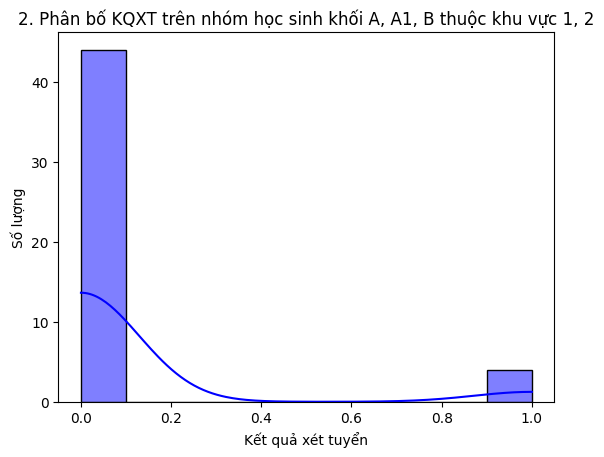

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"  # Đảm bảo đường dẫn đúng
df = pd.read_csv(file_path)

# 2. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2
if {"KT", "KV", "KQXT"}.issubset(df.columns):
    # Lọc dữ liệu theo khối thi A, A1, B và khu vực 1, 2
    df_kqxt = df[(df["KT"].isin(["A", "A1", "B"])) & (df["KV"].isin(["1", "2"]))]

    if df_kqxt.empty:
        print("Không có học sinh nào thuộc khối A, A1, B trong khu vực 1, 2!")
    else:
        # Trực quan dữ liệu KQXT
        sns.histplot(df_kqxt["KQXT"].dropna(), bins=10, kde=True, color="blue")
        plt.title("2. Phân bố KQXT trên nhóm học sinh khối A, A1, B thuộc khu vực 1, 2")
        plt.xlabel("Kết quả xét tuyển")
        plt.ylabel("Số lượng")
        plt.show()
else:
    print("Dữ liệu không có đủ cột cần thiết!")


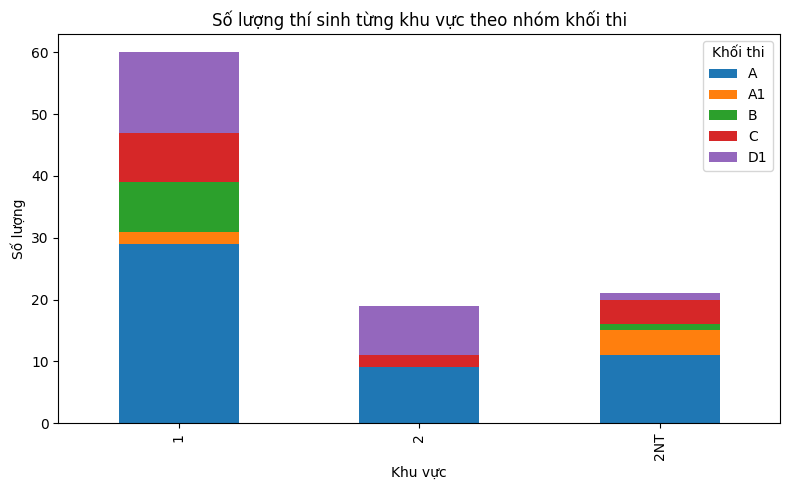

In [ ]:
# 3. Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi
df_khoi_kv = df.groupby(["KV", "KT"]).size().unstack()
df_khoi_kv.plot(kind="bar", figsize=(8, 5), stacked=True)

# Tiêu đề và các thông số khác
plt.title("Số lượng thí sinh từng khu vực theo nhóm khối thi")
plt.xlabel("Khu vực")
plt.ylabel("Số lượng")
plt.legend(title="Khối thi")

# Tinh chỉnh layout để không bị cắt
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


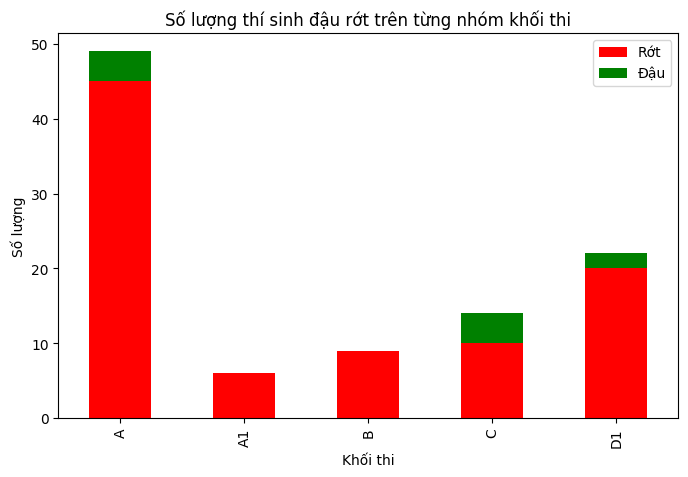

In [ ]:
# 4. Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi
df_pass_fail_khoi = df.groupby(["KT", "KQXT"]).size().unstack()
df_pass_fail_khoi.plot(kind="bar", figsize=(8, 5), stacked=True, color=["red", "green"])
plt.title("Số lượng thí sinh đậu rớt trên từng nhóm khối thi")
plt.xlabel("Khối thi")
plt.ylabel("Số lượng")
plt.legend(["Rớt", "Đậu"])
plt.show()

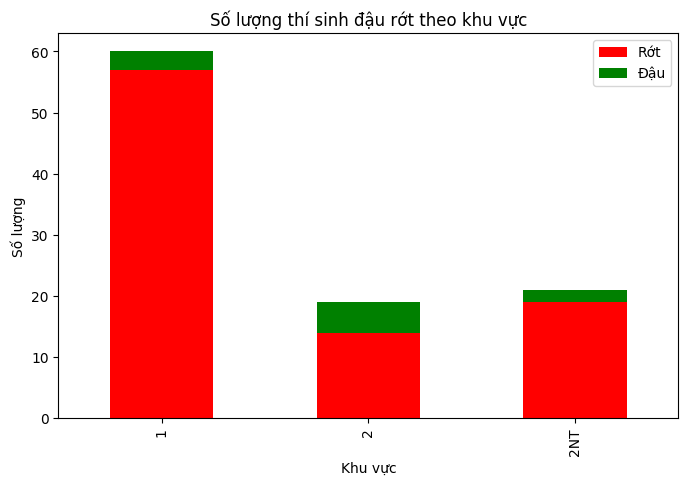

In [ ]:
# 5. Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực
df_pass_fail_kv = df.groupby(["KV", "KQXT"]).size().unstack()
df_pass_fail_kv.plot(kind="bar", figsize=(8, 5), stacked=True, color=["red", "green"])
plt.title("Số lượng thí sinh đậu rớt theo khu vực")
plt.xlabel("Khu vực")
plt.ylabel("Số lượng")
plt.legend(["Rớt", "Đậu"])
plt.show()

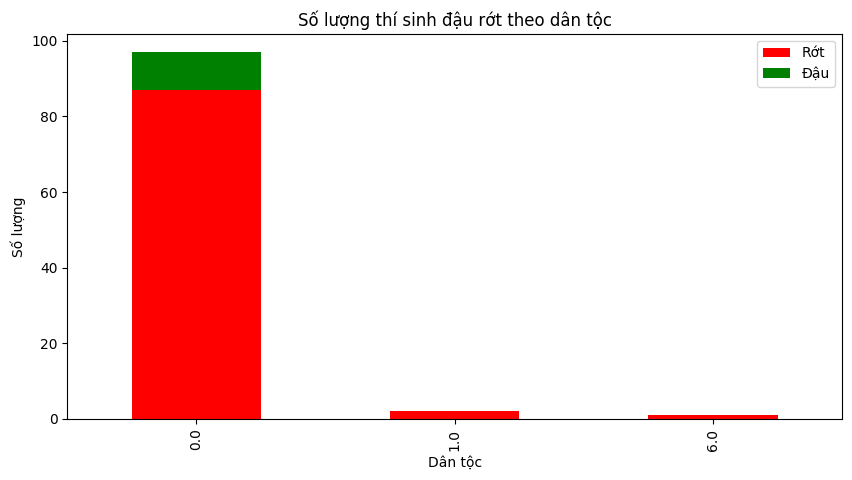

In [ ]:
# 6. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc
df_pass_fail_dt = df.groupby(["DT", "KQXT"]).size().unstack()
df_pass_fail_dt.plot(kind="bar", figsize=(10, 5), stacked=True, color=["red", "green"])
plt.title("Số lượng thí sinh đậu rớt theo dân tộc")
plt.xlabel("Dân tộc")
plt.ylabel("Số lượng")
plt.legend(["Rớt", "Đậu"])
plt.show()

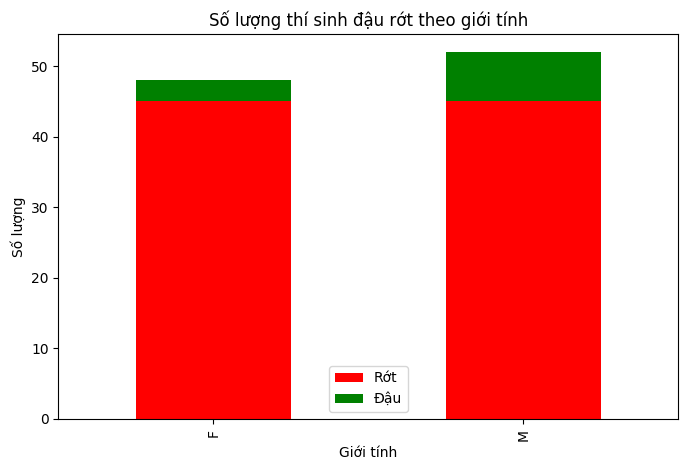

In [ ]:
# 7. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính
df_pass_fail_gt = df.groupby(["GT", "KQXT"]).size().unstack()
df_pass_fail_gt.plot(kind="bar", figsize=(8, 5), stacked=True, color=["red", "green"])
plt.title("Số lượng thí sinh đậu rớt theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.legend(["Rớt", "Đậu"])
plt.show()

**Phần 4**

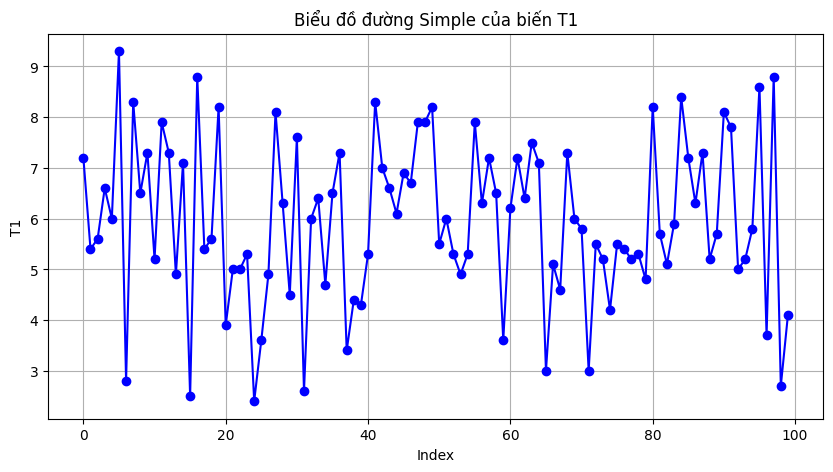

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# 1. Vẽ biểu đồ đường Simple cho biến T1
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["T1"], marker="o", linestyle="-", color="blue")
plt.title("Biểu đồ đường Simple của biến T1")
plt.xlabel("Index")
plt.ylabel("T1")
plt.grid(True)
plt.show()

In [ ]:
# 2. Tạo biến phân loại (phanlopt1) cho môn Toán (T1)
def classify_t1(score):
    if score < 5:
        return "k"
    elif 5 <= score < 7:
        return "tb"
    elif 7 <= score < 8:
        return "k"
    else:
        return "g"

df["phanlopt1"] = df["T1"].apply(classify_t1)


In [ ]:
# 3. Lập bảng tần số cho biến phanlopt1
phanlopt1_freq = df["phanlopt1"].value_counts()
print("Bảng tần số của biến phanlopt1:")
print(phanlopt1_freq)

Bảng tần số của biến phanlopt1:
phanlopt1
tb    46
k     42
g     12
Name: count, dtype: int64


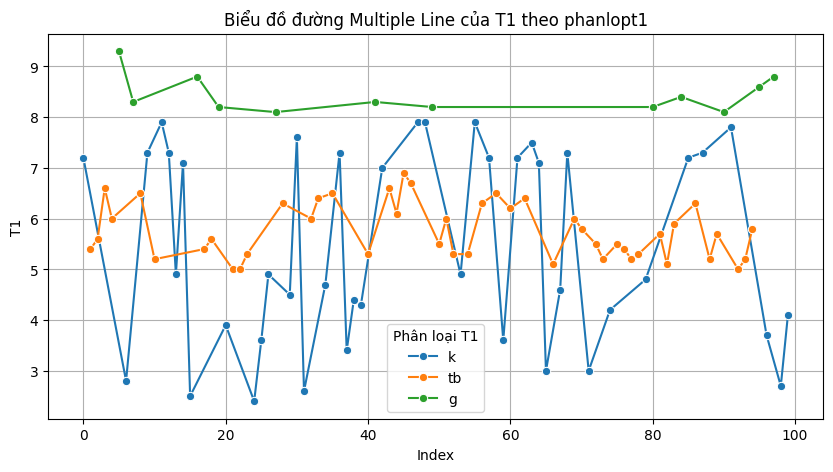

In [ ]:
# 4. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y="T1", hue="phanlopt1", marker="o")
plt.title("Biểu đồ đường Multiple Line của T1 theo phanlopt1")
plt.xlabel("Index")
plt.ylabel("T1")
plt.grid(True)
plt.legend(title="Phân loại T1")
plt.show()


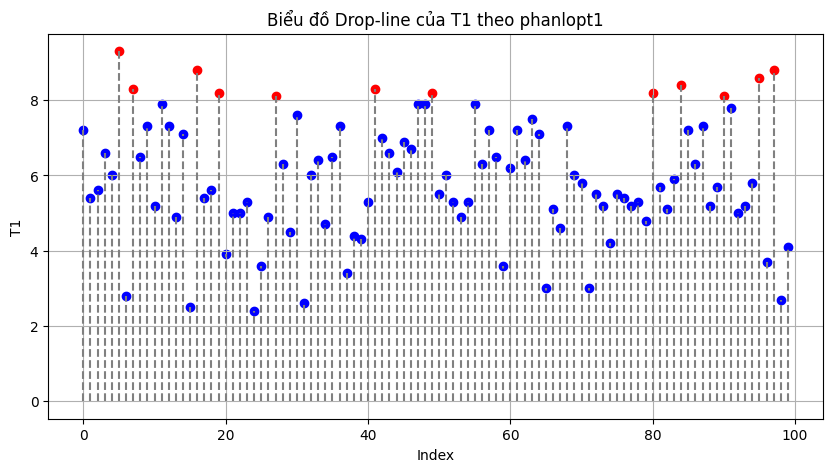

In [ ]:
# 5. Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1
plt.figure(figsize=(10, 5))
for i in range(len(df)):
    plt.plot([df.index[i], df.index[i]], [0, df["T1"].iloc[i]], linestyle="dashed", color="gray")
    plt.scatter(df.index[i], df["T1"].iloc[i], c="red" if df["phanlopt1"].iloc[i] == "g" else "blue")

plt.title("Biểu đồ Drop-line của T1 theo phanlopt1")
plt.xlabel("Index")
plt.ylabel("T1")
plt.grid(True)
plt.show()


**Phần 5**

count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64


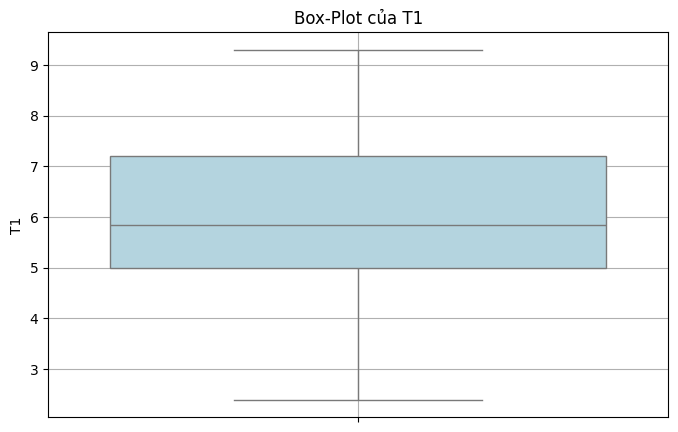

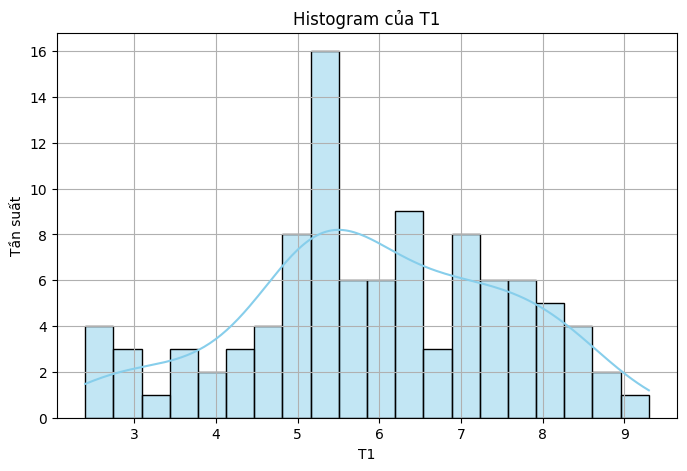

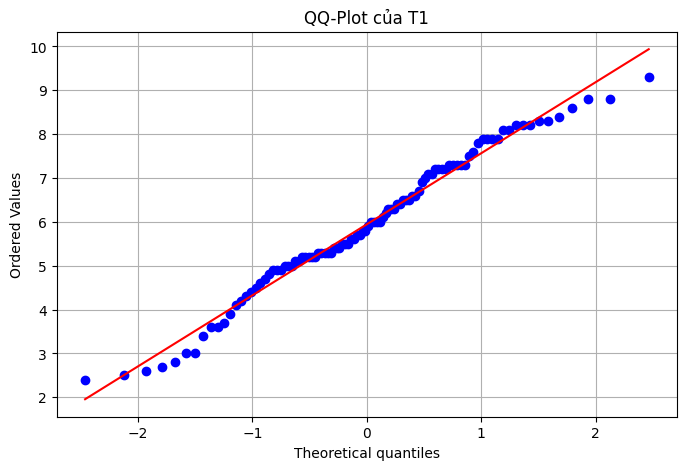

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Đọc dữ liệu từ tệp CSV
file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# 1. Mô tả và khảo sát phân phối cho biến T1
print(df["T1"].describe())

# Vẽ biểu đồ Box-Plot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["T1"], color="lightblue")
plt.title("Box-Plot của T1")
plt.grid()
plt.show()

# Vẽ biểu đồ Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["T1"], bins=20, kde=True, color="skyblue")
plt.title("Histogram của T1")
plt.xlabel("T1")
plt.ylabel("Tần suất")
plt.grid()
plt.show()

# Kiểm chứng phân phối chuẩn QQ-Plot
plt.figure(figsize=(8, 5))
stats.probplot(df["T1"], dist="norm", plot=plt)
plt.title("QQ-Plot của T1")
plt.grid()
plt.show()

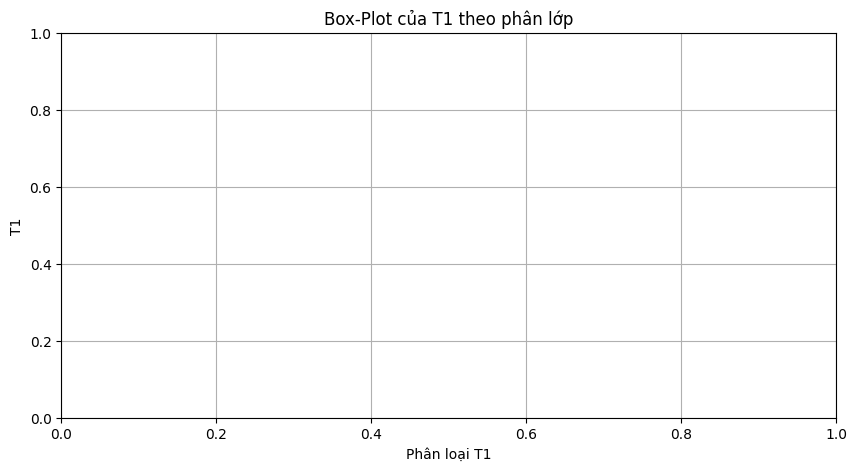

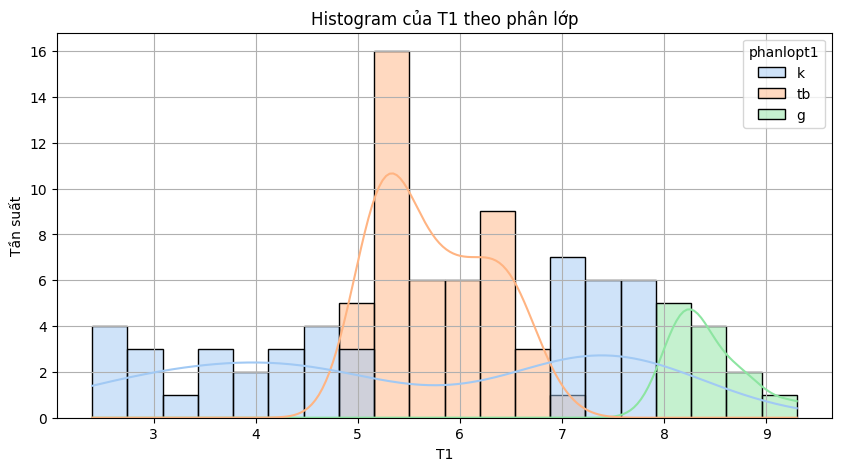

<Figure size 800x500 with 0 Axes>

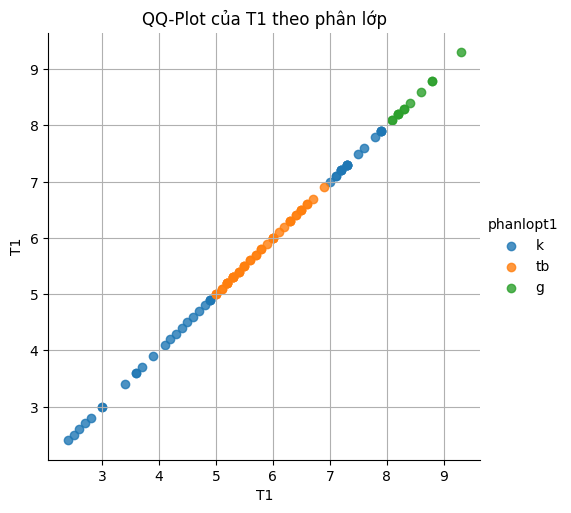

In [ ]:
# 2. Mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phân lớp
plt.figure(figsize=(10, 5))
def classify_t1(score):
    if score < 5:
        return "k"
    elif 5 <= score < 7:
        return "tb"
    elif 7 <= score < 8:
        return "k"
    else:
        return "g"

df["phanlopt1"] = df["T1"].apply(classify_t1)
plt.title("Box-Plot của T1 theo phân lớp")
plt.xlabel("Phân loại T1")
plt.ylabel("T1")
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df, x="T1", hue="phanlopt1", bins=20, kde=True, palette="pastel")
plt.title("Histogram của T1 theo phân lớp")
plt.xlabel("T1")
plt.ylabel("Tần suất")
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.lmplot(x="T1", y="T1", hue="phanlopt1", data=df, fit_reg=False)
plt.title("QQ-Plot của T1 theo phân lớp")
plt.grid()
plt.show()

Hệ số tương quan giữa DH1 và T1: 0.049254392161041535


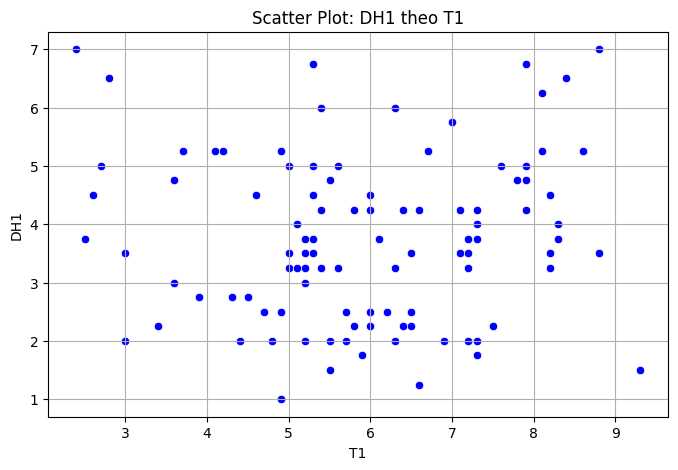

In [ ]:
# 3. Khảo sát tương quan giữa biến DH1 theo biến T1
correlation = df[["DH1", "T1"]].corr().iloc[0,1]
print(f"Hệ số tương quan giữa DH1 và T1: {correlation}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["T1"], y=df["DH1"], color="blue")
plt.title("Scatter Plot: DH1 theo T1")
plt.xlabel("T1")
plt.ylabel("DH1")
plt.grid()
plt.show()

<Figure size 800x500 with 0 Axes>

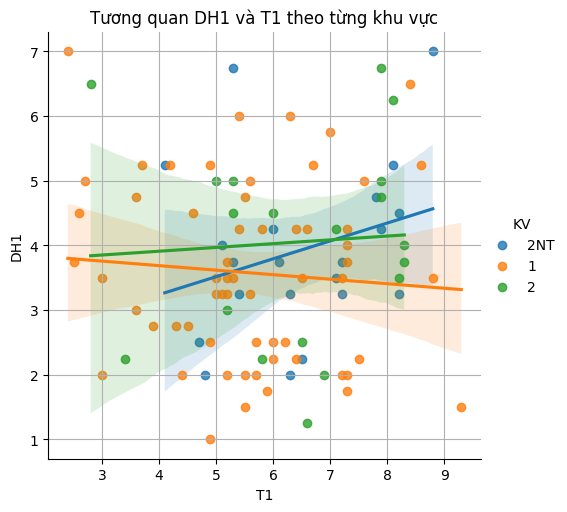

In [ ]:
# 4. Khảo sát tương quan giữa DH1 theo T1 trên từng nhóm khu vực
plt.figure(figsize=(8, 5))
sns.lmplot(x="T1", y="DH1", hue="KV", data=df, fit_reg=True)
plt.title("Tương quan DH1 và T1 theo từng khu vực")
plt.grid()
plt.show()

Ma trận tương quan giữa DH1, DH2, DH3:
          DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

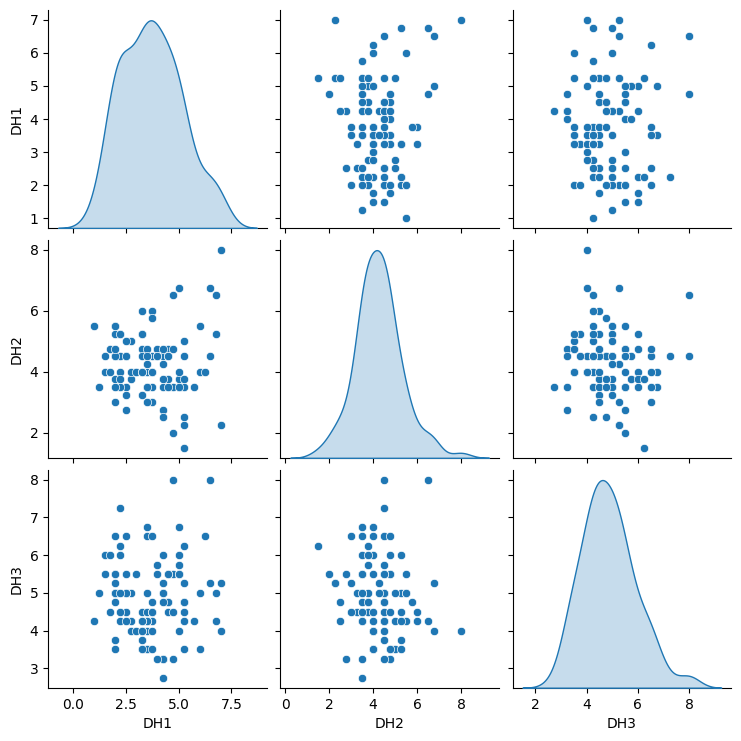

In [ ]:
# 5. Khảo sát tương quan giữa DH1, DH2, DH3
correlation_matrix = df[["DH1", "DH2", "DH3"]].corr()
print("Ma trận tương quan giữa DH1, DH2, DH3:")
print(correlation_matrix)

sns.pairplot(df, vars=["DH1", "DH2", "DH3"], kind="scatter", diag_kind="kde", palette="coolwarm")
plt.show()